Task 1 : Preparing our dataset

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [13]:
tracks = pd.read_csv('fma-rock-vs-hiphop.csv')
tracks.head()

track_id  bit_rate  comments        composer         date_created  \
0       135    256000         1             NaN  2008-11-26 01:43:26   
1       136    256000         1             NaN  2008-11-26 01:43:35   
2       151    192000         0             NaN  2008-11-26 01:44:55   
3       152    192000         0             NaN  2008-11-26 01:44:58   
4       153    256000         0  Arc and Sender  2008-11-26 01:45:00   

         date_recorded  duration  favorites genre_top    genres  ...  \
0  2008-11-26 00:00:00       837          0      Rock  [45, 58]  ...   
1  2008-11-26 00:00:00       509          0      Rock  [45, 58]  ...   
2                  NaN       192          0      Rock      [25]  ...   
3                  NaN       193          0      Rock      [25]  ...   
4  2008-11-26 00:00:00       405          5      Rock      [26]  ...   

  information interest  language_code  \
0         NaN     2484             en   
1         NaN     1948             en   
2         NaN      701             en   
3         NaN      637             en   
4         NaN      354             en   

                                             license listens  lyricist number  \
0  Attribution-NonCommercial-ShareAlike 3.0 Inter...    1832       NaN      0   
1  Attribution-NonCommercial-ShareAlike 3.0 Inter...    1498       NaN      0   
2  Attribution-NonCommercial-ShareAlike 3.0 Inter...     148       NaN      4   
3  Attribution-NonCommercial-ShareAlike 3.0 Inter...      98       NaN     11   
4  Attribution-NonCommercial-NoDerivatives (aka M...     424       NaN      2   

   publisher tags                       title  
0        NaN   []                Father's Day  
1        NaN   []  Peel Back The Mountain Sky  
2        NaN   []                 Untitled 04  
3        NaN   []                 Untitled 11  
4        NaN   []          Hundred-Year Flood  

[5 rows x 21 columns]

In [14]:
echonest_metrics = pd.read_json('echonest-metrics.json',precise_float = True)
echonest_metrics.head()

track_id  acousticness  danceability    energy  instrumentalness  \
0            2      0.416675      0.675894  0.634476          0.010628   
1            3      0.374408      0.528643  0.817461          0.001851   
10         145      0.235506      0.438672  0.487752          0.716122   
100        341      0.977282      0.468808  0.134975          0.687700   
1000      3457      0.081256      0.897197  0.367886          0.104474   

      liveness  speechiness    tempo   valence  
0     0.177647     0.159310  165.922  0.576661  
1     0.105880     0.461818  126.957  0.269240  
10    0.070359     0.047298  120.790  0.650452  
100   0.105381     0.073124  119.646  0.430707  
1000  0.085845     0.041271  100.744  0.749293

In [15]:
# Merge the track_id and genre_top columns of tracks and echonest_metrics on track_id values
echo_tracks = pd.merge(left = tracks[['track_id', 'genre_top']], right=echonest_metrics, on='track_id')
echo_tracks.head()

track_id genre_top  acousticness  danceability    energy  instrumentalness  \
0       153      Rock      0.988306      0.255661  0.979774          0.973006   
1       154      Rock      0.970135      0.352946  0.023852          0.957113   
2       155      Rock      0.981657      0.142249  0.912122          0.967294   
3       169      Rock      0.989141      0.225978  0.722835          0.263076   
4       170      Rock      0.886660      0.298518  0.744333          0.920950   

   liveness  speechiness   tempo   valence  
0  0.121342     0.051740  90.241  0.034018  
1  0.113261     0.032177  53.758  0.035632  
2  0.363510     0.087527  91.912  0.034325  
3  0.092371     0.053406  94.322  0.028347  
4  0.139587     0.088781  97.880  0.073548

In [16]:
# Inspecting the resultant dataframe
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
track_id            4802 non-null int64
genre_top           4802 non-null object
acousticness        4802 non-null float64
danceability        4802 non-null float64
energy              4802 non-null float64
instrumentalness    4802 non-null float64
liveness            4802 non-null float64
speechiness         4802 non-null float64
tempo               4802 non-null float64
valence             4802 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


In [17]:
#Correlation Matrix
corr_metrics = echo_tracks.corr()
corr_metrics.style.background_gradient()

In [18]:
features = echo_tracks.drop(['genre_top', 'track_id'], axis = 1)

labels = echo_tracks['genre_top']

# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a new variable
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)


In [19]:
scaled_train_features

array([[ 1.36170559, -0.98589622,  1.45332318, ..., -0.36415677,
        -1.07200261, -1.57310227],
       [ 1.31234237, -0.45568108, -2.46398518, ..., -0.49822414,
        -2.14506572, -1.5670495 ],
       [ 1.34364478, -1.60400213,  1.17609079, ..., -0.11890299,
        -1.022854  , -1.57194929],
       ...,
       [-1.29470431,  1.17682795,  0.13265633, ...,  0.85182206,
        -0.93541008, -0.07941825],
       [-1.13869115, -0.02253433,  0.57117905, ...,  1.40951543,
         1.31301348,  0.47513794],
       [-0.90611434,  1.10148973,  0.56322452, ...,  1.36030881,
        -1.43669053,  0.76217464]])

Performing PCA

In [20]:
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_
exp_variance

array([0.24297674, 0.18044316, 0.13650309, 0.12994089, 0.11056248,
       0.08302245, 0.06923783, 0.04731336])

In [21]:
# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_),exp_variance)
ax.set_xlabel('Principal Component')
plt.show()

In [22]:
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)
cum_exp_variance

array([0.24297674, 0.4234199 , 0.55992299, 0.68986388, 0.80042636,
       0.88344881, 0.95268664, 1.        ])

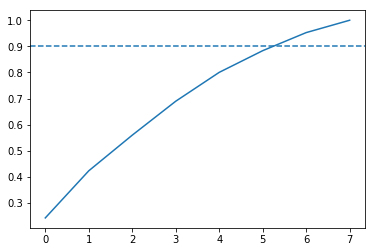

In [27]:
#PLOTING
fig, ax = plt.subplots()
ax.plot(range(8),cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')
plt.show()

In [29]:
#chosen component
n_components = 7

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=10)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

In [30]:
pca_projection.shape

(4802, 7)